In [30]:
# Import all necessary libraries.
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

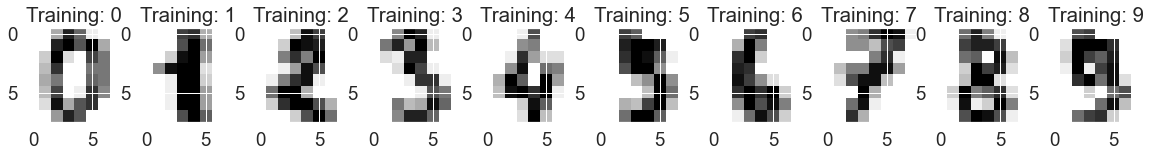

In [31]:
# Load the digits dataset.
digits = load_digits()

# Plot some digits from the data-set.
plt.figure(figsize=(20, 5))
for i in range(0,10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % digits.target[i])
plt.show()

# To apply a classifier on this data, we need to flatten the image, to turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [32]:
# Split data into train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=False)

## 'weights' and 'n_neighbors' hyperparameters that optimize the performance of the k-NN

In [51]:
# Set parameters for grid-search.
param_grid = [{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 10, 15, 20]}]

# Instantiate k-NN class.
clf = KNeighborsClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=3, verbose=3, n_jobs=-1)

# Find best hyperparameters.
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 10, 15, 20],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [53]:
print('Optimal Hyperparameters:\n', grid_search.best_params_)
print('\nBest Score:\n', grid_search.best_score_)

Optimal Hyperparameters:
 {'n_neighbors': 1, 'weights': 'uniform'}

Best Score:
 0.9568545581071678


In [58]:
# Create an instance of Neighbours Classifier and fit the data with best k.
clf = KNeighborsClassifier(n_neighbors=1, weights='uniform') # Definir com GridSearchCV qual o melhor k = n_neighbors

#clf = KNeighborsClassifier(n_neighbors=3, weights='uniform') # Para conseguir 97% de precisão com o classificador KNeighborsClassifier, o n_neighbors deveria ser 3.

# Train the classifier.
clf.fit(x_train, y_train)

# Predict.
y_pred = clf.predict(x_test)

## Precision of Classificator

In [59]:
print("Accuracy of KNeighborsClassifier model is:", accuracy_score(y_test, y_pred)*100,'%')

Accuracy of KNeighborsClassifier model is: 95.55555555555556 %


## Confusion Matrix

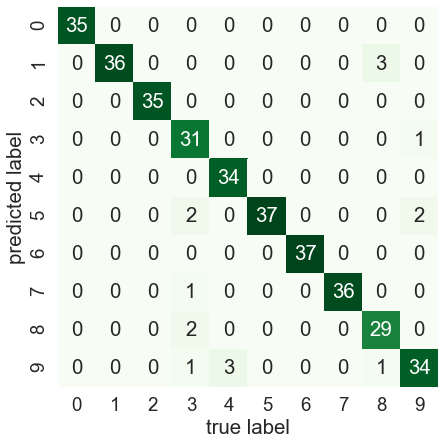

In [60]:
# Plot the confusion matrix.
fig = plt.figure(figsize=(7,7))
mat = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.7)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=digits.target_names, yticklabels=digits.target_names, cmap="Greens")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('confusion_matrix.png', dpi=600)
plt.show()

## Main classification metrics

In [57]:
# Print classification report.
print('Classifier Report:\n', classification_report(y_test, y_pred))

Classifier Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        35
           3       0.97      0.84      0.90        37
           4       1.00      0.92      0.96        37
           5       0.90      1.00      0.95        37
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        36
           8       0.94      0.88      0.91        33
           9       0.87      0.92      0.89        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

